## Modelos de Regressão ##
#### Regressão Linear ####

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Define x (variável dependente, ou feature) como um número aleatório entre 1 e 100
x = 2 * np.random.rand(100,1)

# Define y (variável independente, ou target) como uma função linear de x
y = 4 + 3 * x + np.random.randn(100,1) 

# Basicamente (3x + (4 + número_aleatório))

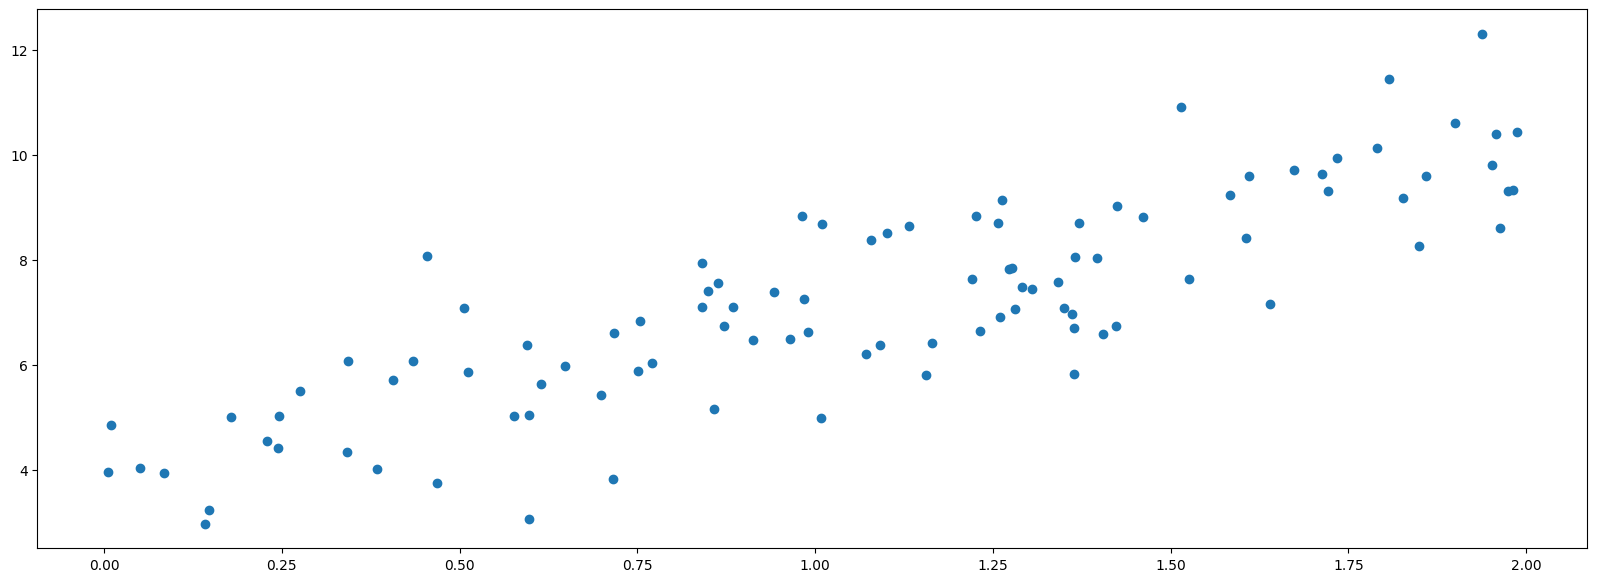

In [3]:
# No gráfico abaixo, é notável a linearidade da reta crescente. Isso se deve à linearidade da função
# A disperção dos pontos no gráfico se deve ao "ruído" causado pelo intercepto 4 + número_aleatório
fig, ax = plt.subplots(figsize = (20,7))
plt.scatter(x,y)

Antes de avançarmos, é importante entender o que determinamos até aqui:

Definimos que:
1. &emsp;x é uma matriz que multiplica valores aleatórios por 2  
2. &emsp;y é uma matriz cujos valores são o resultado de uma função proporcional a "x".  
&emsp;&emsp;Portanto:  
&emsp;&emsp;&emsp;&emsp;2a. &emsp;y[0] = (3 * x[0]) + (4 + número aleatório)  
&emsp;&emsp;&emsp;&emsp;2b. &emsp;Por ser uma função proporcional, conforme x aumenta, y também cresce. Assim como podemos ver no gráfico.


Nos próximos passos, iremos utilizar a chamada "função normal" para identificar os *_coeficientes_* da nossa função de regressão linear.

In [4]:
# Aqui estamos definindo uma matriz cuja primeira coluna é inteiramente de 1
x_b = np.c_[np.ones((100,1)), x]

In [5]:
# Aqui temos que ir por partes, a função .T em "x_b.T" transpõe a matriz x_b
# A transposição de uma matriz significa que as colunas vão se tornar linhas e vice-versa, mantendo a indexação
# A função .dot multiplica as matrizes


# Aplicando a Equação Normal:
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

# Agora theta contém os coeficientes da regressão linear (incluindo o intercepto)
print("Coeficientes:", theta)


Coeficientes: [[3.88681284]
 [3.0804328 ]]


Basicamente a função normal é utilizada para encontrar os coeficientes de uma função, que são os números que multiplicam as variáveis independentes (features), no caso o "x".
Por exemplo:

y = x² + 2x + 6

Nessa função, os coeficientes (thetas) são 1 e 2, pois:
- 1 multiplica o x²
- 2 multiplica o x
- 6 é o termo constante (intercepto)

In [6]:
# Aqui vamos definir uma nova variável: "y_hat", ou "y_chapéu"
y_hat = theta[0] + x * theta[1]

# y_hat equivale à aplicação de uma nova função que tenta ser uma aproximação da função y.
# Ou seja, na função ((theta_0 * x) + theta_1), a 

In [7]:
y_hat[0]

array([7.80615267])

In [8]:
theta

array([[3.88681284],
       [3.0804328 ]])

In [9]:
# Demonstração prática de que o valor obtido pela função não é exatamente igual ao target, porém é aproximado

print(f'''A função é: theta_0 + (theta_1 * x), que tenta se aproximar do target.
Porém {y_hat[0]} é diferente de {y[0]}, pois há uma diferença de {y_hat[0] - y[0]}''')
print('')

A função é: theta_0 + (theta_1 * x), que tenta se aproximar do target.
Porém [7.80615267] é diferente de [7.8311127], pois há uma diferença de [-0.02496003]



Nas células acima, a variável theta contém uma matriz de dois valores, equivalentes ao theta_0 e theta_1

O theta_0 se refere ao coeficiente calculado para a variável x
Já o theta_1 se refere ao intercepto, ou seja, 4 + número_aleatório na função original.

Caso a demonstração acima não tenha ficado clara. Basicamente y_hat tenta ser uma *aproximação* do y (target)

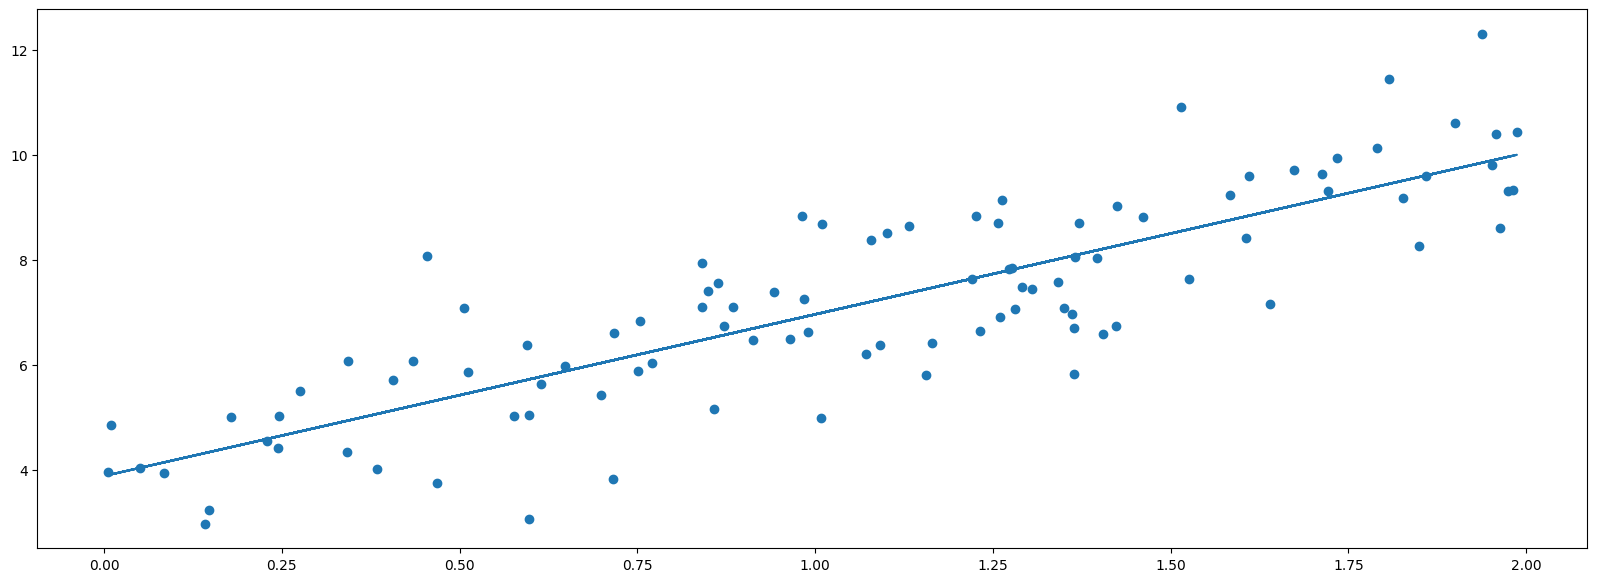

In [10]:
# No gráfico abaixo, traçamos uma linha contendo os valores encontrados pelo algoritmo para y_chapéu.
# Esses valores de y_chapéu são os valores que melhor "se ajustam" de acordo com os coeficientes que localizamos acima.
fig, ax = plt.subplots(figsize = (20, 7))
plt.plot(x,y_hat)
plt.scatter(x, y)

### Gradient Descent ###

Agora vamos começar a ajustar o nosso modelo para ficar cada vez mais preciso, aprendendo com os próprios erros.
Para isso vamos usar a técnica "Descida de Gradiente", ou Gradient Descent.

Abaixo vamos definir algumas variáveis chaves para o processo:

- Taxa de Aprendizado: O "tamanho dos passos" que o algoritmo vai dar ao descer o gradiente.

&emsp;&emsp;Se for muito alto, pode "pular" o mínimo. Se for muito alto, pode ficar lento demais.<br>
&emsp;&emsp;Tipicamente usa-se na matemática a letra eta η para representar "taxas"

- Número de Iterações: Número de vezes que o algoritmo vai atualizar os coeficientes theta

&emsp;&emsp;Cada iteração é uma rodada de cálculo que ajusta de acordo com a última taxa de erro

In [15]:
# Definindo a taxa de aprendizado para 0.1, uma taxa baixa,
eta = 0.1
n_iteracoes = 10
n = 100

theta = np.random.randn(2, 1)

In [12]:
theta

array([[0.84305107],
       [0.12258431]])

C:\Users\kauan\AppData\Local\Temp\ipykernel_28020\2590934340.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm", n_iteracoes)


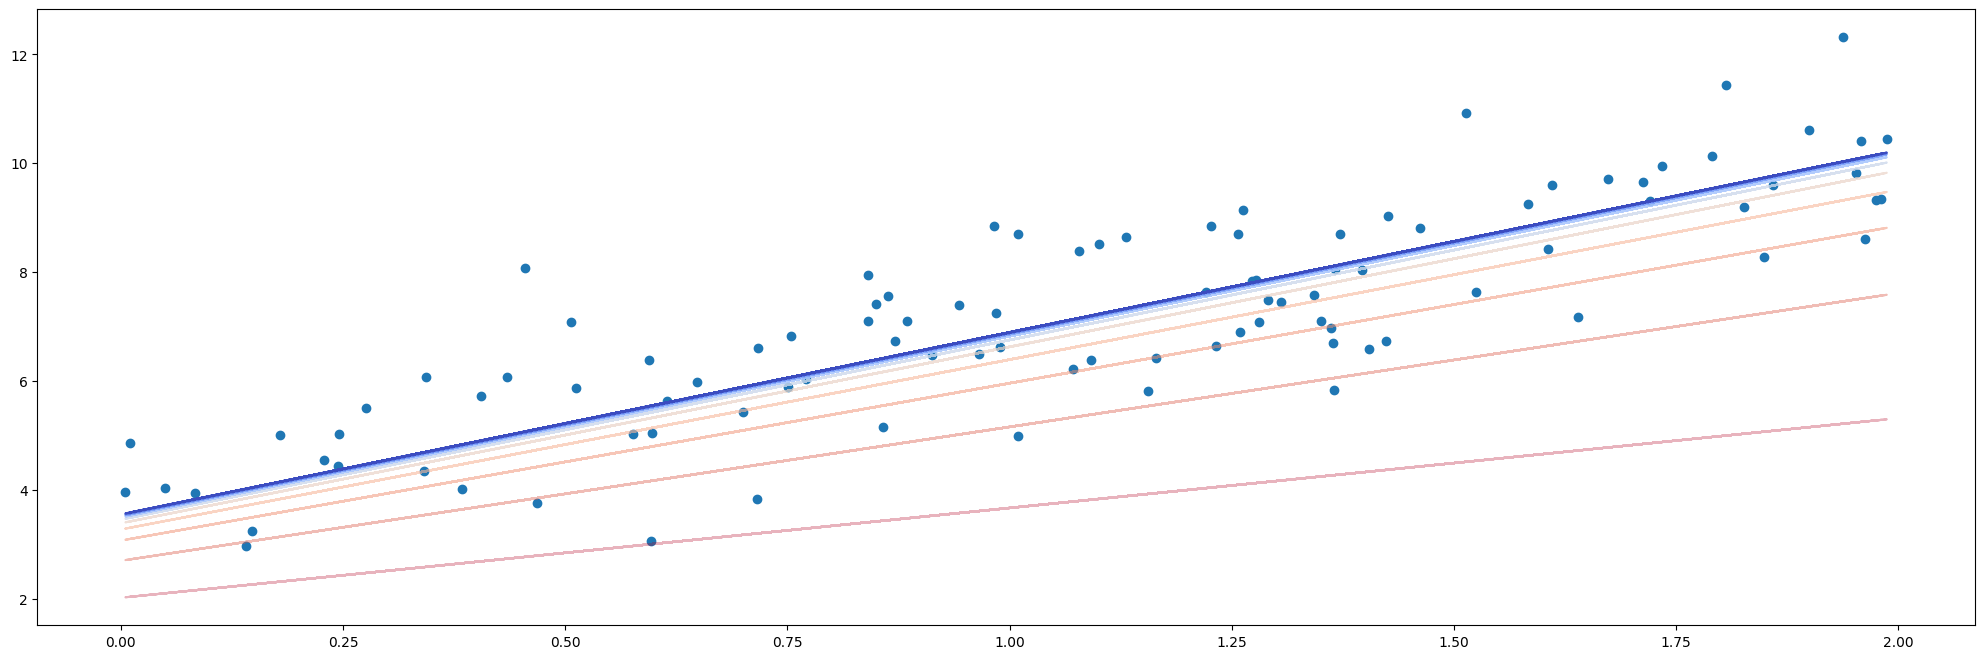

In [16]:
fig, ax = plt.subplots(figsize=(25, 8))
plt.scatter(x, y)

# Colormap com transição de vermelho para azul
cmap = cm.get_cmap("coolwarm", n_iteracoes)

for iteracao in range(n_iteracoes):
    gradients = 2/n * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_hat = theta[0] + x * theta[1]

    # Cor baseada na iteração (do vermelho ao azul)
    cor = cmap(n_iteracoes - 1 - iteracao)

    # Transparência controlada e segura
    alpha_val = min(0.3 + iteracao / n_iteracoes, 1.0)

    ax.plot(x, y_hat, alpha=alpha_val, color=cor)

plt.show()

No gráfico acima, podemos observar a escalada de correção do modelo.
Nas primeiras iterações (linhas vermelho-alaranjadas mais fracas), o modelo estava com os coeficientes mais enviesados, ou seja, estavam mais distantes dos seus "valores ideais".
Ao longo das iterações, conforme previsto, a linha fica visivelmente mais ao centro da dispersão e cada vez com menos distância da última iteração.